In [ ]:
# https://drive.google.com/file/d//view?usp=sharing
!gdown 'https://drive.google.com/uc?id=1OUvgBGdshxoec8u4ILfMzLiAqbKSrhRU&confirm=t'

Downloading...
From: https://drive.google.com/uc?id=1OUvgBGdshxoec8u4ILfMzLiAqbKSrhRU&confirm=t
To: /content/datasets.zip
100% 8.49M/8.49M [00:00<00:00, 65.9MB/s]


In [ ]:
!gdown 'https://drive.google.com/uc?id=13Edlr7LVGjfXkLUs3q9PnW1If-fE4dp5&confirm=t'

Downloading...
From: https://drive.google.com/uc?id=13Edlr7LVGjfXkLUs3q9PnW1If-fE4dp5&confirm=t
To: /content/KDDTest.csv
100% 2.64M/2.64M [00:00<00:00, 138MB/s]


In [ ]:
!unzip 'datasets.zip'

Archive:  datasets.zip
replace datasets/KDDTrain+.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd

import pickle 
from os import path

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense 
from keras.models import Sequential 
from keras.models import model_from_json 

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

from keras.utils.vis_utils import plot_model

In [ ]:

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
# importing dataset
data = pd.read_csv('datasets/KDDTrain+.txt',header=None, names=col_names)
test_data = pd.read_csv('KDDTest.csv',header=None, names=col_names)

In [ ]:
# print dataset
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
print(data.shape)

test_data.drop(['difficulty_level'],axis=1,inplace=True)
print(test_data.shape)

(125973, 42)
(22543, 42)


In [ ]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# number of attack labels 
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [ ]:
labels = list(data['label'].unique())
test_data = test_data[test_data['label'].isin(labels)]
test_data = test_data.reset_index()
test_data = test_data.drop(['index'], axis = 1)
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal
4,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18788,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,smurf
18789,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
18790,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
18791,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back


In [ ]:
test_data['label'].value_counts()

normal             9710
neptune            4657
guess_passwd       1231
warezmaster         944
satan               735
smurf               665
back                359
portsweep           157
ipsweep             141
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
rootkit              13
teardrop             12
land                  7
ftp_write             3
loadmodule            2
perl                  2
phf                   2
imap                  1
Name: label, dtype: int64

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
# calling change_label() function
change_label(data)
change_label(test_data)

In [ ]:
# distribution of attack classes
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [ ]:
test_data.label.value_counts()

normal    9710
Dos       5741
R2L       2199
Probe     1106
U2R         37
Name: label, dtype: int64

In [ ]:
#Outlier Anaylsis

from scipy import stats
import statistics as s

numeric_data = data.copy(deep=True)
numeric_data_test = test_data.copy(deep=True)

numeric_data = numeric_data.drop(['protocol_type', 'service','flag', 'label'], axis=1)
numeric_data_test = numeric_data_test.drop(['protocol_type', 'service','flag', 'label'], axis=1)

# numeric_data.dtypes
Pp = 14.826
made_data = Pp * stats.median_abs_deviation(numeric_data)
made_data_test = Pp * stats.median_abs_deviation(numeric_data_test)


numeric_data = numeric_data.astype(np.float)
numeric_data_test = numeric_data_test.astype(np.float)


def estimator(val, made, col):
  if val > made[col]:
    return np.nan

  return val


made_data_map = {}
for idx, col in enumerate(numeric_data.columns):
  if made_data[idx] > 150:
    made_data_map[col] = made_data[idx]

made_data_test_map = {}
for idx, col in enumerate(numeric_data_test.columns):
  if made_data_test[idx] > 150:
    made_data_test_map[col] = made_data_test[idx]


for col in made_data_map.keys():
  numeric_data[col] = numeric_data.apply(lambda row: estimator(row[col], made_data_map, col), axis=1)

numeric_data = numeric_data.dropna()
filtered_idx_data = list(numeric_data.index)
labels = list(data['label'].unique())
labels.remove('U2R')
data = data[data['label'].isin(labels)]
data = data[data.index.isin(filtered_idx_data)]
data.reset_index(inplace = True)
data = data.drop(['index'], axis = 1)
data

<ipython-input-18-768e34e60f56>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_data = numeric_data.astype(np.float)
<ipython-input-18-768e34e60f56>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_data_test = numeric_data_test.astype(np.float)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88086,0,tcp,http,SF,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal
88087,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
88088,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
88089,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [ ]:
for col in made_data_test_map.keys():
  numeric_data_test[col] = numeric_data_test.apply(lambda row: estimator(row[col], made_data_test_map, col), axis=1)

numeric_data_test = numeric_data_test.dropna()
filtered_idx_data = list(numeric_data_test.index)

labels = list(test_data['label'].unique())
labels.remove('U2R')
test_data = test_data[test_data['label'].isin(labels)]
test_data = test_data[test_data.index.isin(filtered_idx_data)]
test_data.reset_index()
# test_data = test_data.drop(['index'], axis = 1)
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,Dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,Dos
4,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
5,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,R2L
6,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,...,18,0.07,0.05,0.00,0.00,0.00,0.00,1.00,1.00,Dos
18788,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,Dos
18789,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
18790,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal


In [ ]:
data = pd.concat([data, test_data], axis=0)
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,...,18,0.07,0.05,0.00,0.00,0.00,0.00,1.00,1.00,Dos
102210,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,Dos
102211,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
102212,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal


# **Data Normalization**

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [ ]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.11464,tcp,ftp_data,SF,2.092792,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.967411,-0.959621,-0.252626,0.003726,-0.320530,-0.513194,-0.503145,-0.256562,-0.399996,normal
1,-0.11464,udp,other,SF,0.070148,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-1.177300,-1.335998,2.733197,2.149972,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,normal
2,-0.11464,tcp,private,S0,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.958665,-1.114600,-0.147860,-0.510164,-0.320530,2.005094,2.016338,-0.412299,-0.399996,Dos
3,-0.11464,tcp,http,SF,0.574343,-0.003493,-0.017697,-0.097228,-0.007224,-0.095342,...,1.044027,0.877982,-0.409774,-0.419477,-0.007317,-0.437645,-0.477950,-0.412299,-0.370071,normal
4,-0.11464,tcp,http,SF,0.380873,-0.005225,-0.017697,-0.097228,-0.007224,-0.095342,...,1.044027,0.877982,-0.409774,-0.510164,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,normal


# **One-hot-encoding**

In [ ]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [ ]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Binary Classification**

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
# np.save("labels/le1_classes.npy",le1.classes_,allow_pickle=True)

In [ ]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.11464,tcp,ftp_data,SF,2.092792,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.959621,-0.252626,0.003726,-0.320530,-0.513194,-0.503145,-0.256562,-0.399996,normal,1
1,-0.11464,udp,other,SF,0.070148,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-1.335998,2.733197,2.149972,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,normal,1
2,-0.11464,tcp,private,S0,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-1.114600,-0.147860,-0.510164,-0.320530,2.005094,2.016338,-0.412299,-0.399996,abnormal,0
3,-0.11464,tcp,http,SF,0.574343,-0.003493,-0.017697,-0.097228,-0.007224,-0.095342,...,0.877982,-0.409774,-0.419477,-0.007317,-0.437645,-0.477950,-0.412299,-0.370071,normal,1
4,-0.11464,tcp,http,SF,0.380873,-0.005225,-0.017697,-0.097228,-0.007224,-0.095342,...,0.877982,-0.409774,-0.510164,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,normal,1


In [ ]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.11464,tcp,ftp_data,SF,2.092792,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,0.003726,-0.320530,-0.513194,-0.503145,-0.256562,-0.399996,1,0,1,normal
1,-0.11464,udp,other,SF,0.070148,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,2.149972,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,1,0,1,normal
2,-0.11464,tcp,private,S0,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.510164,-0.320530,2.005094,2.016338,-0.412299,-0.399996,0,1,0,abnormal
3,-0.11464,tcp,http,SF,0.574343,-0.003493,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.419477,-0.007317,-0.437645,-0.477950,-0.412299,-0.370071,1,0,1,normal
4,-0.11464,tcp,http,SF,0.380873,-0.005225,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.510164,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,-0.11464,tcp,iso_tsap,REJ,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.510164,-0.320530,-0.513194,-0.503145,2.702435,2.592481,0,1,0,abnormal
102210,-0.11464,icmp,ecr_i,SF,5.264532,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,2.512718,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,0,1,0,abnormal
102211,-0.11464,tcp,smtp,SF,3.869201,-0.005244,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.479935,-0.242226,-0.488011,-0.503145,-0.412299,-0.399996,1,0,1,normal
102212,-0.11464,tcp,http,SF,1.072676,-0.005109,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.479935,-0.242226,-0.488011,-0.503145,-0.412299,-0.399996,1,0,1,normal


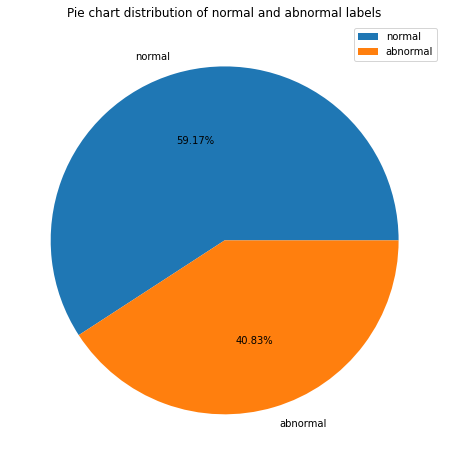

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
plt.show()

# **Multi-class Classification**

In [ ]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [ ]:
# np.save("labels/le2_classes.npy",le2.classes_,allow_pickle=True)
le2.classes_

array(['Dos', 'Probe', 'R2L', 'normal'], dtype=object)

In [ ]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,normal,label
0,-0.11464,tcp,ftp_data,SF,2.092792,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.513194,-0.503145,-0.256562,-0.399996,3,0,0,0,1,normal
1,-0.11464,udp,other,SF,0.070148,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.513194,-0.503145,-0.412299,-0.399996,3,0,0,0,1,normal
2,-0.11464,tcp,private,S0,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,2.005094,2.016338,-0.412299,-0.399996,0,1,0,0,0,Dos
3,-0.11464,tcp,http,SF,0.574343,-0.003493,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.437645,-0.477950,-0.412299,-0.370071,3,0,0,0,1,normal
4,-0.11464,tcp,http,SF,0.380873,-0.005225,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.513194,-0.503145,-0.412299,-0.399996,3,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,-0.11464,tcp,iso_tsap,REJ,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.513194,-0.503145,2.702435,2.592481,0,1,0,0,0,Dos
102210,-0.11464,icmp,ecr_i,SF,5.264532,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.513194,-0.503145,-0.412299,-0.399996,0,1,0,0,0,Dos
102211,-0.11464,tcp,smtp,SF,3.869201,-0.005244,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.488011,-0.503145,-0.412299,-0.399996,3,0,0,0,1,normal
102212,-0.11464,tcp,http,SF,1.072676,-0.005109,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.488011,-0.503145,-0.412299,-0.399996,3,0,0,0,1,normal


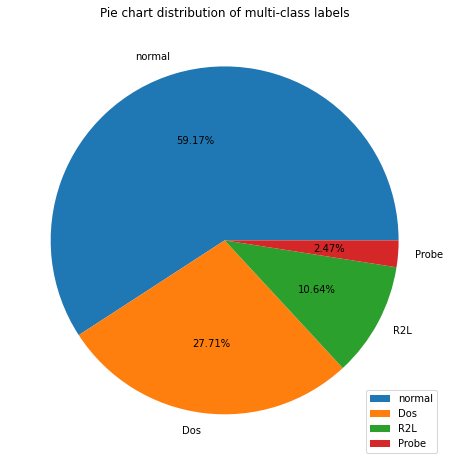

In [ ]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
# plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **Feature Extraction**

In [ ]:
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.11464,tcp,ftp_data,SF,2.092792,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,0.003726,-0.320530,-0.513194,-0.503145,-0.256562,-0.399996,1,0,1,normal
1,-0.11464,udp,other,SF,0.070148,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,2.149972,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,1,0,1,normal
2,-0.11464,tcp,private,S0,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.510164,-0.320530,2.005094,2.016338,-0.412299,-0.399996,0,1,0,abnormal
3,-0.11464,tcp,http,SF,0.574343,-0.003493,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.419477,-0.007317,-0.437645,-0.477950,-0.412299,-0.370071,1,0,1,normal
4,-0.11464,tcp,http,SF,0.380873,-0.005225,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.510164,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,-0.11464,tcp,iso_tsap,REJ,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.510164,-0.320530,-0.513194,-0.503145,2.702435,2.592481,0,1,0,abnormal
102210,-0.11464,icmp,ecr_i,SF,5.264532,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,...,2.512718,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,0,1,0,abnormal
102211,-0.11464,tcp,smtp,SF,3.869201,-0.005244,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.479935,-0.242226,-0.488011,-0.503145,-0.412299,-0.399996,1,0,1,normal
102212,-0.11464,tcp,http,SF,1.072676,-0.005109,-0.017697,-0.097228,-0.007224,-0.095342,...,-0.479935,-0.242226,-0.488011,-0.503145,-0.412299,-0.399996,1,0,1,normal


In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

<ipython-input-43-3ad456acdc98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = bin_data['intrusion']


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

src_bytes                   0.512584
srv_serror_rate             0.583524
serror_rate                 0.583725
dst_host_serror_rate        0.591421
dst_host_srv_serror_rate    0.593405
logged_in                   0.645503
dst_host_same_srv_rate      0.693436
same_srv_rate               0.704539
dst_host_srv_count          0.737292
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
numeric_bin

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.11464,2.092792,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,-0.864470,-0.009731,...,-0.967411,-0.959621,-0.252626,0.003726,-0.320530,-0.513194,-0.503145,-0.256562,-0.399996,1
1,-0.11464,0.070148,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,-0.864470,-0.009731,...,-1.177300,-1.335998,2.733197,2.149972,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,1
2,-0.11464,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,-0.864470,-0.009731,...,-0.958665,-1.114600,-0.147860,-0.510164,-0.320530,2.005094,2.016338,-0.412299,-0.399996,0
3,-0.11464,0.574343,-0.003493,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,1.156779,-0.009731,...,1.044027,0.877982,-0.409774,-0.419477,-0.007317,-0.437645,-0.477950,-0.412299,-0.370071,1
4,-0.11464,0.380873,-0.005225,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,1.156779,-0.009731,...,1.044027,0.877982,-0.409774,-0.510164,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,-0.11464,-0.785812,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,-0.864470,-0.009731,...,-1.028628,-1.181019,-0.147860,-0.510164,-0.320530,-0.513194,-0.503145,2.702435,2.592481,0
102210,-0.11464,5.264532,-0.005319,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,-0.864470,-0.009731,...,1.044027,0.877982,-0.409774,2.512718,-0.320530,-0.513194,-0.503145,-0.412299,-0.399996,0
102211,-0.11464,3.869201,-0.005244,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,1.156779,-0.009731,...,0.047054,0.258068,-0.095477,-0.479935,-0.242226,-0.488011,-0.503145,-0.412299,-0.399996,1
102212,-0.11464,1.072676,-0.005109,-0.017697,-0.097228,-0.007224,-0.095342,-0.071791,1.156779,-0.009731,...,1.044027,0.877982,-0.409774,-0.479935,-0.242226,-0.488011,-0.503145,-0.412299,-0.399996,1


In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
numeric_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate
0,-0.615658,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-0.959621,-0.967411,0.657887
1,-0.473366,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-1.335998,-1.177300,-1.620628
2,0.949553,1.985588,1.984040,2.005094,2.016338,-0.864470,-1.114600,-0.958665,-1.694928
3,-0.576851,-0.014126,-0.016705,-0.437645,-0.477950,1.156779,0.877982,1.044027,0.657887
4,-0.253460,-0.514055,-0.516891,-0.513194,-0.503145,1.156779,0.877982,1.044027,0.657887
...,...,...,...,...,...,...,...,...,...
102209,1.001295,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-1.181019,-1.028628,-1.472029
102210,0.044059,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,0.877982,1.044027,0.657887
102211,-0.628593,-0.514055,-0.516891,-0.488011,-0.503145,1.156779,0.258068,0.047054,0.657887
102212,-0.615658,-0.514055,-0.516891,-0.488011,-0.503145,1.156779,0.877982,1.044027,0.657887


In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [ ]:
categorical

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102211,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102212,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
numeric_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.615658,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-0.959621,-0.967411,0.657887,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.473366,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-1.335998,-1.177300,-1.620628,0,...,0,0,0,0,0,0,0,0,1,0
2,0.949553,1.985588,1.984040,2.005094,2.016338,-0.864470,-1.114600,-0.958665,-1.694928,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.576851,-0.014126,-0.016705,-0.437645,-0.477950,1.156779,0.877982,1.044027,0.657887,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.253460,-0.514055,-0.516891,-0.513194,-0.503145,1.156779,0.877982,1.044027,0.657887,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,1.001295,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-1.181019,-1.028628,-1.472029,0,...,1,0,0,0,0,0,0,0,0,0
102210,0.044059,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,0.877982,1.044027,0.657887,1,...,0,0,0,0,0,0,0,0,1,0
102211,-0.628593,-0.514055,-0.516891,-0.488011,-0.503145,1.156779,0.258068,0.047054,0.657887,0,...,0,0,0,0,0,0,0,0,1,0
102212,-0.615658,-0.514055,-0.516891,-0.488011,-0.503145,1.156779,0.877982,1.044027,0.657887,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# saving final dataset to disk
bin_data.to_csv("./bin_data.csv")
# final dataset for binary classification
bin_data

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.615658,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-0.959621,-0.967411,0.657887,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.473366,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-1.335998,-1.177300,-1.620628,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.949553,1.985588,1.984040,2.005094,2.016338,-0.864470,-1.114600,-0.958665,-1.694928,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,-0.576851,-0.014126,-0.016705,-0.437645,-0.477950,1.156779,0.877982,1.044027,0.657887,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.253460,-0.514055,-0.516891,-0.513194,-0.503145,1.156779,0.877982,1.044027,0.657887,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,1.001295,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,-1.181019,-1.028628,-1.472029,0,...,0,0,0,0,0,0,0,1,0,abnormal
102210,0.044059,-0.514055,-0.516891,-0.513194,-0.503145,-0.864470,0.877982,1.044027,0.657887,1,...,0,0,0,0,1,0,0,1,0,abnormal
102211,-0.628593,-0.514055,-0.516891,-0.488011,-0.503145,1.156779,0.258068,0.047054,0.657887,0,...,0,0,0,0,1,0,1,0,1,normal
102212,-0.615658,-0.514055,-0.516891,-0.488011,-0.503145,1.156779,0.877982,1.044027,0.657887,0,...,0,0,0,0,1,0,1,0,1,normal


In [ ]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

<ipython-input-52-507512f95f51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

src_bytes                   0.503150
count                       0.533534
logged_in                   0.660968
srv_serror_rate             0.691435
serror_rate                 0.692066
dst_host_serror_rate        0.699145
dst_host_srv_serror_rate    0.700971
dst_host_srv_count          0.735370
dst_host_same_srv_rate      0.739547
same_srv_rate               0.805224
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','normal','label']])

In [ ]:
# saving final dataset to disk
multi_data.to_csv('./multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,normal,label
0,-0.615658,-0.864470,-0.514055,-0.516891,-0.513194,-0.959621,-0.503145,-0.967411,0.657887,0,...,0,0,1,0,3,0,0,0,1,normal
1,-0.473366,-0.864470,-0.514055,-0.516891,-0.513194,-1.335998,-0.503145,-1.177300,-1.620628,0,...,0,0,1,0,3,0,0,0,1,normal
2,0.949553,-0.864470,1.985588,1.984040,2.005094,-1.114600,2.016338,-0.958665,-1.694928,0,...,0,0,0,0,0,1,0,0,0,Dos
3,-0.576851,1.156779,-0.014126,-0.016705,-0.437645,0.877982,-0.477950,1.044027,0.657887,0,...,0,0,1,0,3,0,0,0,1,normal
4,-0.253460,1.156779,-0.514055,-0.516891,-0.513194,0.877982,-0.503145,1.044027,0.657887,0,...,0,0,1,0,3,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102209,1.001295,-0.864470,-0.514055,-0.516891,-0.513194,-1.181019,-0.503145,-1.028628,-1.472029,0,...,0,0,0,0,0,1,0,0,0,Dos
102210,0.044059,-0.864470,-0.514055,-0.516891,-0.513194,0.877982,-0.503145,1.044027,0.657887,1,...,0,0,1,0,0,1,0,0,0,Dos
102211,-0.628593,1.156779,-0.514055,-0.516891,-0.488011,0.258068,-0.503145,0.047054,0.657887,0,...,0,0,1,0,3,0,0,0,1,normal
102212,-0.615658,1.156779,-0.514055,-0.516891,-0.488011,0.877982,-0.503145,1.044027,0.657887,0,...,0,0,1,0,3,0,0,0,1,normal


# **Long Short-Term Memory Classifier (Binary Classification)**

In [ ]:
X = bin_data.iloc[:,0:89] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']] # target attribute

In [ ]:
X_train = X[:88091]
X_test = X[88091:]
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis = 1)
y_train = Y[:88091]
y_test = Y[88091:]
y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis = 1)

In [ ]:
X_train = X_train.values

In [ ]:
y_train = np.array(y_train)

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [ ]:
x_train.shape

(88091, 1, 89)

In [ ]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=89))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','Precision','Recall'])

In [ ]:
# summary of model layers
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                28000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 28,051
Trainable params: 28,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 4s 89ms/step - loss: 0.6271 - accuracy: 0.8673 - precision: 0.8360 - recall: 0.9788 - val_loss: 0.5609 - val_accuracy: 0.8934 - val_precision: 0.8566 - val_recall: 0.9946
Epoch 2/100
15/15 [==============================] - 1s 51ms/step - loss: 0.5154 - accuracy: 0.8953 - precision: 0.8588 - recall: 0.9955 - val_loss: 0.4579 - val_accuracy: 0.8994 - val_precision: 0.8634 - val_recall: 0.9952
Epoch 3/100
15/15 [==============================] - 1s 60ms/step - loss: 0.4201 - accuracy: 0.8997 - precision: 0.8646 - recall: 0.9947 - val_loss: 0.3721 - val_accuracy: 0.9004 - val_precision: 0.8657 - val_recall: 0.9936
Epoch 4/100
15/15 [==============================] - 1s 61ms/step - loss: 0.3432 - accuracy: 0.9020 - precision: 0.8682 - recall: 0.9934 - val_loss: 0.3063 - val_accuracy: 0.9053 - val_precision: 0.8719 - val_recall: 0.9931
Epoch 5/100
15/15 [==============================] - 1s 58ms/step - loss: 0.2861 - accuracy: 0.9081 - pr

In [ ]:
X_test = X_test.to_numpy()

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

442/442 [==============================] - 1s 2ms/step - loss: 1.0635 - accuracy: 0.8068 - precision: 0.7107 - recall: 0.8764
Test results - Loss: 1.063501000404358 - Accuracy: 80.68398833274841%


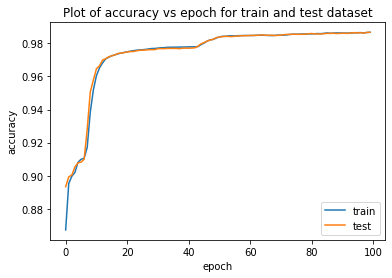

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

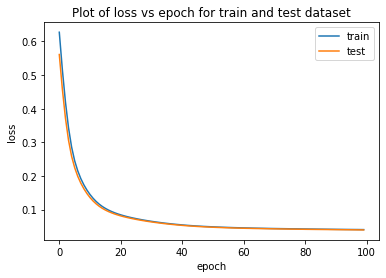

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/lstm_binary_loss.png')
plt.show()

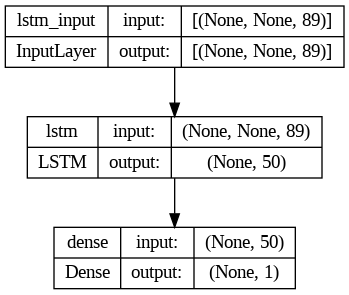

In [ ]:
# representation of model layers
plot_model(lst, show_shapes=True,)

In [ ]:
y_test.shape

(14123, 1)

In [ ]:
y_pred = lst.predict(x_test)

442/442 [==============================] - 2s 2ms/step


In [ ]:
y_pred.shape

(14123, 1)

In [ ]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

442/442 [==============================] - 1s 2ms/step


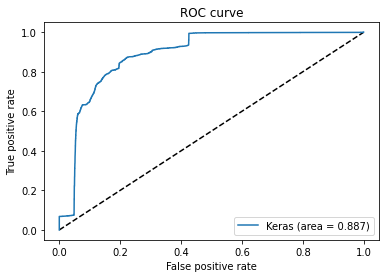

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# plt.savefig('plots/lstm_binary_roc.png')
plt.show()

# **Auto Encoder Classifier (Binary Classification)**

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy','Precision','Recall'])

In [ ]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 89)]              0         
                                                                 
 dense_1 (Dense)             (None, 50)                4500      
                                                                 
 dense_2 (Dense)             (None, 89)                4539      
                                                                 
Total params: 9,039
Trainable params: 9,039
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
177/177 [==============================] - 2s 7ms/step - loss: 0.1161 - accuracy: 0.4886 - precision: 1.0000 - recall: 0.0075 - val_loss: 0.1401 - val_accuracy: 0.3438 - val_precision: 1.0000 - val_recall: 0.0278
Epoch 2/100
177/177 [==============================] - 1s 5ms/step - loss: 0.1076 - accuracy: 0.6233 - precision: 1.0000 - recall: 0.0148 - val_loss: 0.1339 - val_accuracy: 0.5994 - val_precision: 1.0000 - val_recall: 0.0138
Epoch 3/100
177/177 [==============================] - 1s 5ms/step - loss: 0.1069 - accuracy: 0.6856 - precision: 1.0000 - recall: 0.0097 - val_loss: 0.1310 - val_accuracy: 0.6613 - val_precision: 1.0000 - val_recall: 0.0292
Epoch 4/100
177/177 [==============================] - 1s 6ms/step - loss: 0.1067 - accuracy: 0.7148 - precision: 1.0000 - recall: 0.0101 - val_loss: 0.1285 - val_accuracy: 0.7074 - val_precision: 1.0000 - val_recall: 0.0291
Epoch 5/100
177/177 [==============================] - 1s 6ms/step - loss: 0.1067 - accuracy: 0.7323

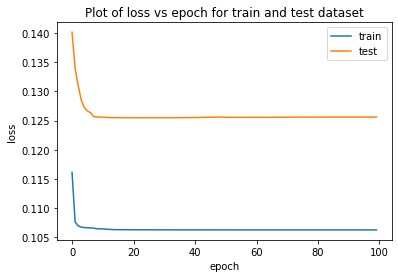

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/ae_binary_loss.png')
plt.show()

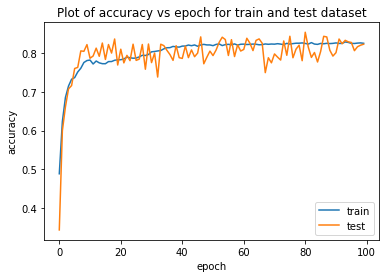

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

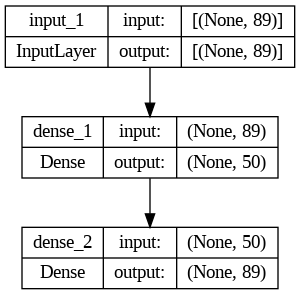

In [ ]:
# representation of model layers
plot_model(autoencoder, show_shapes=True,)

## **AE Classifier**

In [ ]:
# i_dim = predictions.shape[1]
i_dim = 89

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 50 neurons
fvector = Dense(50, activation="sigmoid")(i_layer)                    
#doutput layer
o_layer = Dense(1, activation='sigmoid')(fvector)

In [ ]:
# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])

In [ ]:
# summary of model layers
ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 89)]              0         
                                                                 
 dense_3 (Dense)             (None, 50)                4500      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,551
Trainable params: 4,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
latent_weights = autoencoder.layers[1].get_weights()
ae_classifier.layers[1].set_weights(latent_weights)
ae_classifier.layers[1].trainable = False

In [ ]:
# training the model on training dataset
his = ae_classifier.fit(X_train, y_train, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
141/141 [==============================] - 2s 6ms/step - loss: 0.4130 - accuracy: 0.8507 - precision: 0.9188 - recall: 0.8339 - val_loss: 0.2522 - val_accuracy: 0.9298 - val_precision: 0.9165 - val_recall: 0.9758
Epoch 2/300
141/141 [==============================] - 1s 5ms/step - loss: 0.2073 - accuracy: 0.9423 - precision: 0.9371 - recall: 0.9726 - val_loss: 0.1689 - val_accuracy: 0.9577 - val_precision: 0.9582 - val_recall: 0.9742
Epoch 3/300
141/141 [==============================] - 1s 5ms/step - loss: 0.1512 - accuracy: 0.9605 - precision: 0.9641 - recall: 0.9728 - val_loss: 0.1311 - val_accuracy: 0.9644 - val_precision: 0.9685 - val_recall: 0.9743
Epoch 4/300
141/141 [==============================] - 1s 5ms/step - loss: 0.1227 - accuracy: 0.9676 - precision: 0.9743 - recall: 0.9736 - val_loss: 0.1106 - val_accuracy: 0.9706 - val_precision: 0.9769 - val_recall: 0.9757
Epoch 5/300
141/141 [==============================] - 1s 6ms/step - loss: 0.1064 - accuracy: 0.9713

In [ ]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

442/442 [==============================] - 1s 2ms/step - loss: 1.6001 - accuracy: 0.8275 - precision: 0.7288 - recall: 0.8739
Test results - Loss: 1.6000685691833496 - Accuracy: 82.75229897499084%


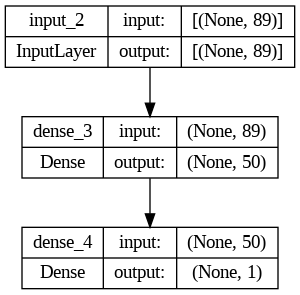

In [ ]:
# representation of model layers
plot_model(ae_classifier, show_shapes=True)

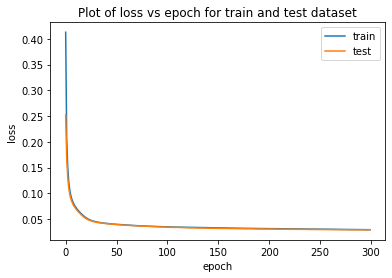

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/ae_classifier_binary_loss.png')
plt.show()

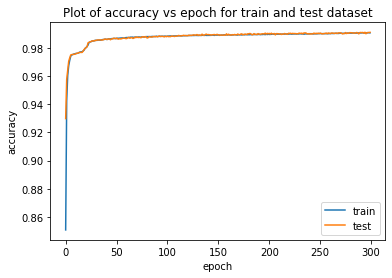

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/ae_classifier_binary_accuracy.png')
plt.show()

In [ ]:
y_pred = ae_classifier.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#auc = auc(fpr, tpr)

442/442 [==============================] - 1s 2ms/step


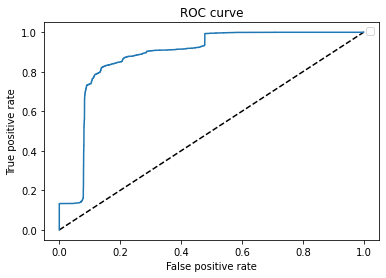

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
# plt.savefig('plots/ae_binary_roc.png')
plt.show()

# **Auto Encoder Classifier (Multi-class Classification)**

In [ ]:
X = multi_data.iloc[:,0:89] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L']]
X_train = X[:88091]
X_test = X[88091:]
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis = 1)
y_train = Y[:88091]
y_test = Y[88091:]
y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis = 1)

X_train = X_train.values
X_test = X_test.values
y_test = y_test.values
y_train = y_train.values


In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50


input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
output_layer = Dense(input_dim, activation='sigmoid')(encoder)

In [ ]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 89)]              0         
                                                                 
 dense_19 (Dense)            (None, 50)                4500      
                                                                 
 dense_20 (Dense)            (None, 89)                4539      
                                                                 
Total params: 9,039
Trainable params: 9,039
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=60,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
177/177 [==============================] - 2s 7ms/step - loss: 0.1410 - accuracy: 0.0634 - val_loss: 0.1065 - val_accuracy: 0.0728
Epoch 2/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0583 - accuracy: 0.0728 - val_loss: 0.0892 - val_accuracy: 0.3025
Epoch 3/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0527 - accuracy: 0.0980 - val_loss: 0.0847 - val_accuracy: 0.3651
Epoch 4/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0501 - accuracy: 0.1025 - val_loss: 0.0830 - val_accuracy: 0.3922
Epoch 5/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0491 - accuracy: 0.1053 - val_loss: 0.0822 - val_accuracy: 0.4031
Epoch 6/100
177/177 [==============================] - 2s 9ms/step - loss: 0.0486 - accuracy: 0.1111 - val_loss: 0.0817 - val_accuracy: 0.4019
Epoch 7/100
177/177 [==============================] - 1s 6ms/step - loss: 0.0483 - accuracy: 0.1680 - val_loss: 0.0812 - val_accuracy: 0.5271

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.1046 - accuracy: 0.8897
Test results - Loss: 0.10457070171833038 - Accuracy: 88.96615505218506%


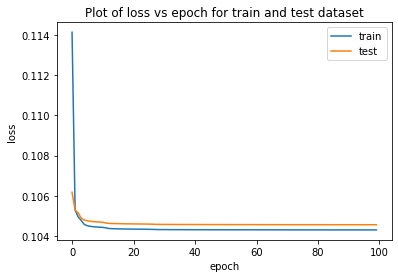

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

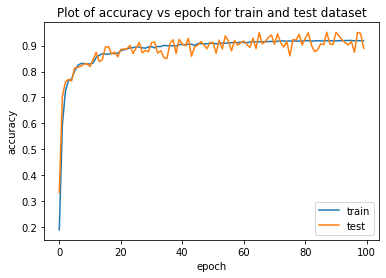

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

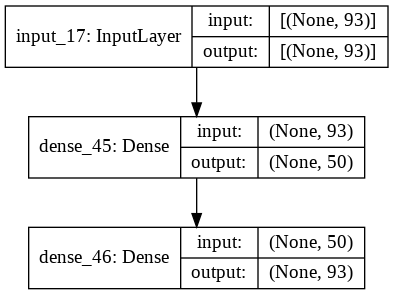

In [ ]:
# representation of model layers
plot_model(autoencoder, show_shapes=True,)

## **AE Classifier**

In [ ]:
i_dim = 89
i_layer = Input(shape=(i_dim, ))
fvector = Dense(50, activation="sigmoid")(i_layer)
o_layer = Dense(4, activation='softmax')(fvector)

In [ ]:
ae_classifier = Model(inputs=i_layer, outputs=o_layer)
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=[['accuracy','Precision','Recall']])

In [ ]:
latent_weights_50 = autoencoder.layers[1].get_weights()
# latent_weights_69 = autoencoder.layers[1].get_weights()
# ae_classifier.layers[1].set_weights(latent_weights_69)
# ae_classifier.layers[1].trainable = False
ae_classifier.layers[1].set_weights(latent_weights_50)
# ae_classifier.layers[1].trainable = False

In [ ]:
ae_classifier.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 89)]              0         
                                                                 
 dense_23 (Dense)            (None, 50)                4500      
                                                                 
 dense_24 (Dense)            (None, 4)                 204       
                                                                 
Total params: 4,704
Trainable params: 204
Non-trainable params: 4,500
_________________________________________________________________


In [ ]:
# training the model on training dataset
his = ae_classifier.fit(X_train, y_train, epochs=325,batch_size=700, validation_split=0.2).history

Epoch 1/325
101/101 [==============================] - 2s 16ms/step - loss: 0.0049 - accuracy: 0.9888 - precision: 0.9891 - recall: 0.9887 - val_loss: 0.0050 - val_accuracy: 0.9884 - val_precision: 0.9886 - val_recall: 0.9884
Epoch 2/325
101/101 [==============================] - 1s 11ms/step - loss: 0.0048 - accuracy: 0.9886 - precision: 0.9889 - recall: 0.9883 - val_loss: 0.0050 - val_accuracy: 0.9893 - val_precision: 0.9894 - val_recall: 0.9890
Epoch 3/325
101/101 [==============================] - 1s 12ms/step - loss: 0.0048 - accuracy: 0.9888 - precision: 0.9891 - recall: 0.9885 - val_loss: 0.0050 - val_accuracy: 0.9881 - val_precision: 0.9884 - val_recall: 0.9880
Epoch 4/325
101/101 [==============================] - 1s 13ms/step - loss: 0.0048 - accuracy: 0.9887 - precision: 0.9891 - recall: 0.9884 - val_loss: 0.0050 - val_accuracy: 0.9881 - val_precision: 0.9884 - val_recall: 0.9879
Epoch 5/325
101/101 [==============================] - 1s 12ms/step - loss: 0.0048 - accuracy: 0

In [ ]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

442/442 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.8022 - precision: 0.7923 - recall: 0.7921
Test results - Loss: 0.09996099025011063 - Accuracy: 80.2182981967926%


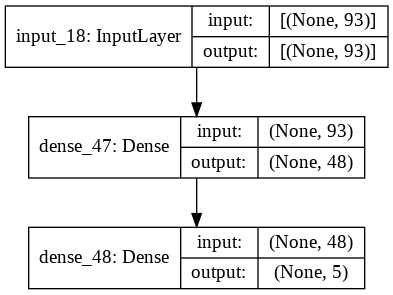

In [ ]:
# representation of model layers
plot_model(ae_classifier, show_shapes=True)

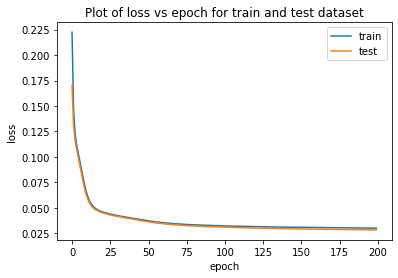

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

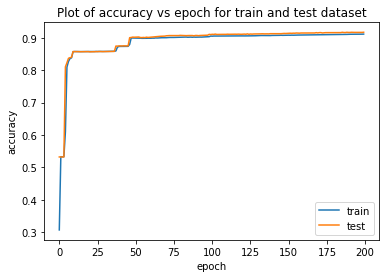

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
y_pred = ae_classifier.predict(X_test)

In [ ]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])

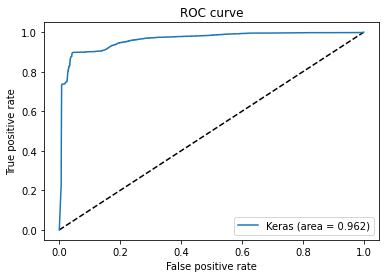

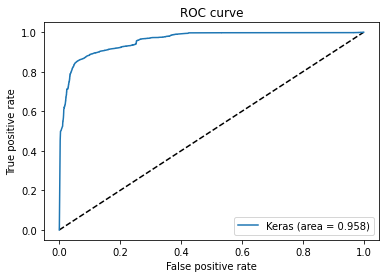

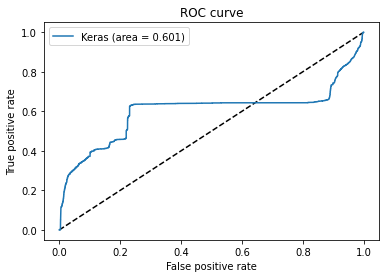

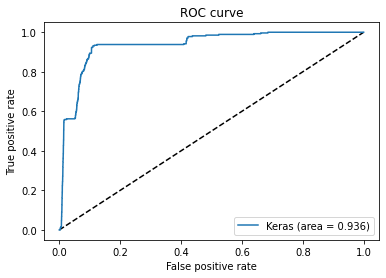

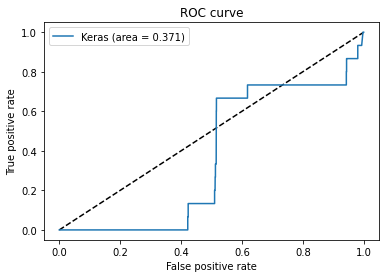

In [ ]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_ae[i], tpr_ae[i], label='Keras (area = {:.3f})'.format(roc_auc_ae[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

In [ ]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

# **LSTM Classifier (Multi-class Classification)**

In [ ]:
X = multi_data.iloc[:,0:89] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L']]
X_train = X[:88091]
X_test = X[88091:]
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis = 1)
y_train = Y[:88091]
y_test = Y[88091:]
y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis = 1)

X_train = X_train.values
X_test = X_test.values
y_test = y_test.values
y_train = y_train.values

# X_train = X_train.to_numpy()
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# y_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))


# X_test = X_test.to_numpy()
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values
y_train = y_train.values

# X_train = X_train.to_numpy()
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# y_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))


# X_test = X_test.to_numpy()
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_test.shape

(14123, 1, 89)

In [ ]:
lst = Sequential()

lst.add(LSTM(50,input_dim=89))

lst.add(Dense(4,activation='softmax'))

lst.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','Precision','Recall'])

lst.summary()
history = lst.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                28000     
                                                                 
 dense_26 (Dense)            (None, 4)                 204       
                                                                 
Total params: 28,204
Trainable params: 28,204
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 5s 127ms/step - loss: 0.1705 - accuracy: 0.7575 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1525 - val_accuracy: 0.8369 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 1s 50ms/step - loss: 0.1375 - accuracy: 0.8602 - precision: 1.0000 - recall: 0.0269 - val_loss: 0.1171 - val_accuracy: 0.8679 - val_precision: 1.0000 - 

In [ ]:

test_results = lst.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

442/442 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.7774 - precision: 0.7801 - recall: 0.7743
Test results - Loss: 0.10159947723150253 - Accuracy: 77.73844003677368%
